# A Statistical Analysis of Indian Movies

### Questions worth asking 

 - Basic Exploration
    - Average rating of movies
    - Average gross per movie
    - Most popular genre
    - Number of Unique Stars
    - Number of unique directors 
     
     
 - Factors affecting movie performance 
    - Is there any realtionship between gross and genre 
    - Is there any realtionship between rating and genre 
    - Is there any relationship between rating and gross 
     
     
 - Can we learn something deeper about directors 
    - How many movies were directed by each director
    - Do most directors stick to the same genres 
    - What are the popular genres for inexperienced directors
     
     
 - Can we learn something deeper about stars
      - Who are the highest grossing stars 
      - Who are the best rated stars 

In [1]:
# Setting up the environment 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# In a notebook environment, display the plots inline
%matplotlib inline


In [2]:
plt.style.use('fivethirtyeight')

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (12, 6))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
#mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
#mpl.rc('axes', grid = False)
# Set backgound color to white
#mpl.rc('axes', facecolor = 'white')


In [3]:
# set location of the csv file contating data about the movies 
file = './hindi_movies.csv'

# load csv file into a pandas datafram 
data = pd.read_csv(file)

# view the first 5 rows of the dataframe
data.head()

,Rating,Votes,Description,Title,Gross,Director,Release,Stars,Genre,Gross (India)
0,8.7,"59,702","Biopic of Mahavir Singh Phogat, who taught wre...",Dangal,"11,151,900",Nitesh Tiwari,21-Dec-16,"Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh","Action,Biography,Drama,Sport",387.39
1,8.2,"106,800",P. K. is a comedy of ideas about a stranger in...,PK,"10,572,800",Rajkumar Hirani,19-Dec-14,"Aamir Khan,Anushka Sharma,Sanjay Dutt","Comedy,Drama,Fantasy,Romance,Sci-Fi",339.50
2,8.1,"51,638",A little mute girl from a Pakistan village get...,Bajrangi Bhaijaan,"7,655,452",Kabir Khan,17-Jul-15,"Salman Khan,Kareena Kapoor Khan,Nawazuddin Sid...","Action,Adventure,Comedy,Drama",320.34
3,7.2,"27,251",Sultan is a story of Sultan Ali Khan - a local...,Sultan,"6,173",Ali Abbas Zafar,6-Jul-16,"Salman Khan,Anushka Sharma,Marko Zaror","Action,Drama,Family,Romance,Sport",300.45
4,5.4,"36,496",The favourite Indian action franchise is back....,Dhoom 3,"8,031,955",Vijay Krishna Acharya,20-Dec-13,"Aamir Khan,Katrina Kaif,Abhishek Bachchan","Action,Crime,Drama,Thriller",280.25


In [4]:
data.iloc[0].apply(type)

Rating           <class 'numpy.float64'>
Votes                      <class 'str'>
Description                <class 'str'>
Title                      <class 'str'>
Gross                      <class 'str'>
Director                   <class 'str'>
Release                    <class 'str'>
Stars                      <class 'str'>
Genre                      <class 'str'>
Gross (India)    <class 'numpy.float64'>
Name: 0, dtype: object

## Understanding the dataset 

- **Title:** The title of the movie. 
- **Description:** A textual description or synopsis of the movie. 
- **Director:** Names of the directors of the movie seperated by commas.
- **Stars:** A comma seperated list of the lead actors starring in the movie.
- **Genre:** A comma seperated list of genres the movie belongs to. 
- **Release:** The release date of the movie in the format day-month-year.
- **Gross(India):** The box office collection of the movie in India, measured in Crore Rupees. 
- **Gross:** The box office collection of the movie in USA, measured in USD.
- **Rating:** The averae rating of the movie on IMDB. 
- **Votes:** The number of ratings the movie has received on IMDB. 

## Cleaning the dataset 
We notice that the *Votes* column is of type `string`, and it should be converted to type `integer`. However, the simple `pd.to_numeric()` will not work as the strings contain commas and therefore commas need to be removed first. The *Gross* column also suffers from the same problem and a similar cleaning and conversion procedure must be followed. 

In [5]:
# For every cell under the Votes column, replace commas with empty strings
# and save the transformed column as the new Votes column
data['Votes'] = data['Votes'].str.replace(',', '')

# Covert the values under the Votes column from string to integer
# and save it as the new Votes column
data['Votes'] = pd.to_numeric(data['Votes'])

In [6]:
# For every cell under the Gross column, replace commas with empty strings
# and save the transformed column as the new Gross column
data['Gross'] = data['Gross'].str.replace(',', '')

# Covert the values under the Gross column from string to integer
# and save it as the new Gross column
data['Gross'] = pd.to_numeric(data['Gross'])

## Exploring the dataset 

In [7]:
# Number of movies in the dataset
data.shape[0]

5607

In [8]:
# Create a dataframe of movies for which a rating is present 
movies_with_rating = data[data['Rating'].isnull() == False]

# Display the summary statistics for Rating and Votes
movies_with_rating[['Rating', 'Votes']].describe()

,Rating,Votes
count,4798.000000,4798.000000
mean,5.948458,1597.706753
std,1.364512,6843.694953
min,1.100000,5.000000
25%,5.000000,21.000000
50%,6.100000,70.000000
75%,7.000000,512.000000
max,9.000000,244050.000000


The *Rating* on IMDb is calculated as the mean of the all the ratings that a particular movie has received. The number of ratings received is *Votes* and from the analysis, it is discovered that the minimum number of *Votes* a movie has received is 5. This number is too low and therefore can produce an unfair, biased *Rating*. Thus, the only Rating that is considered valid is the one for which at least a 100 submissions have been made, i.e. Votes is greater than or equal to 100.  

In [9]:
# Only count rating for movies for which Votes is greater
# than or equal to 100
movies_with_rating = movies_with_rating[movies_with_rating['Votes'] >= 100]
movies_with_rating[['Rating', 'Votes']].describe()

,Rating,Votes
count,2141.000000,2141.000000
mean,5.930453,3542.204577
std,1.459720,9907.354596
min,1.700000,100.000000
25%,4.900000,248.000000
50%,6.100000,667.000000
75%,7.100000,2504.000000
max,8.900000,244050.000000


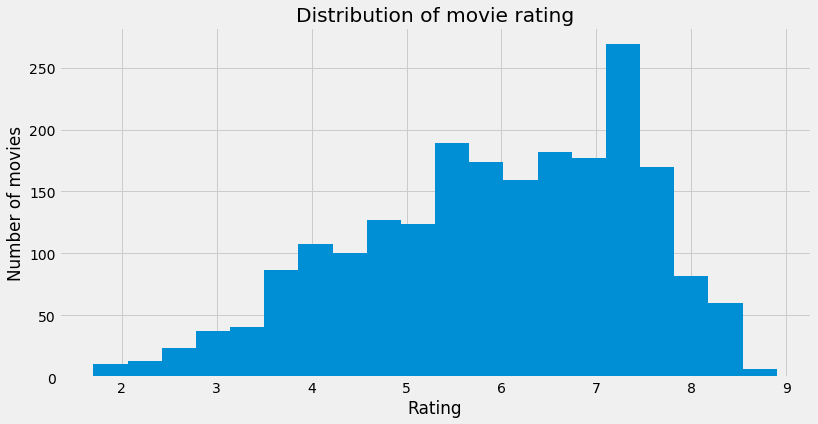

In [10]:
# Plot a histogram of movie ratings
plt.hist(movies_with_rating['Rating'], bins=20)
plt.title("Distribution of movie rating")
plt.xlabel("Rating")
plt.ylabel("Number of movies")
plt.show()